# Create Spotify App

Go to your Spotify Dashboard at https://developer.spotify.com/dashboard/ and create a new application, then grab the Client ID and Client Secret Key.

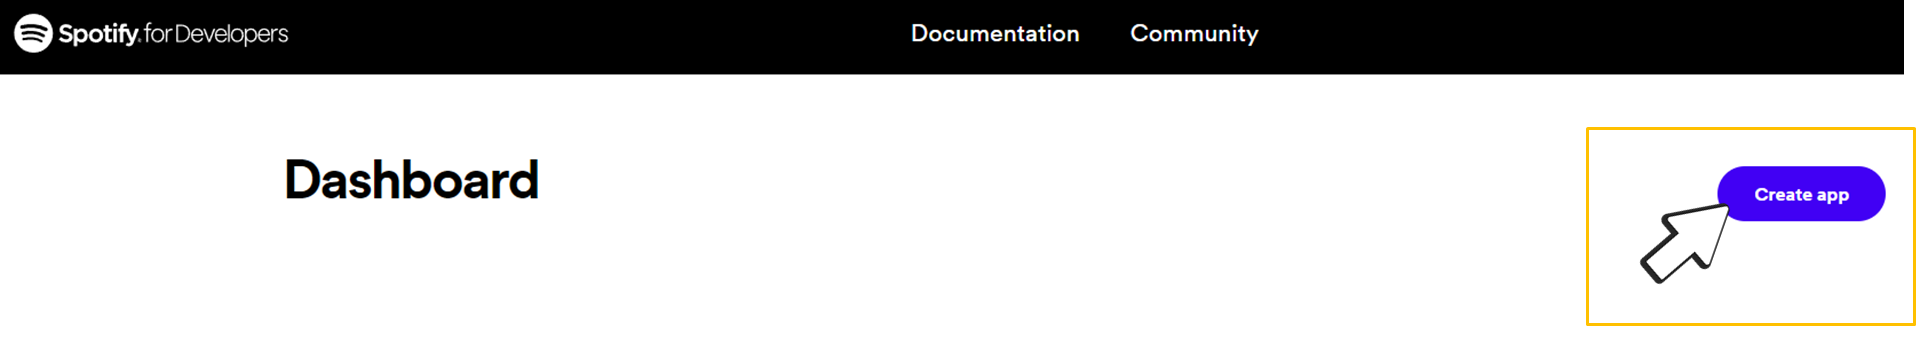

Submit information to create the application. Then, click "Save". In this case, I'll put "http://example.org/callback/"

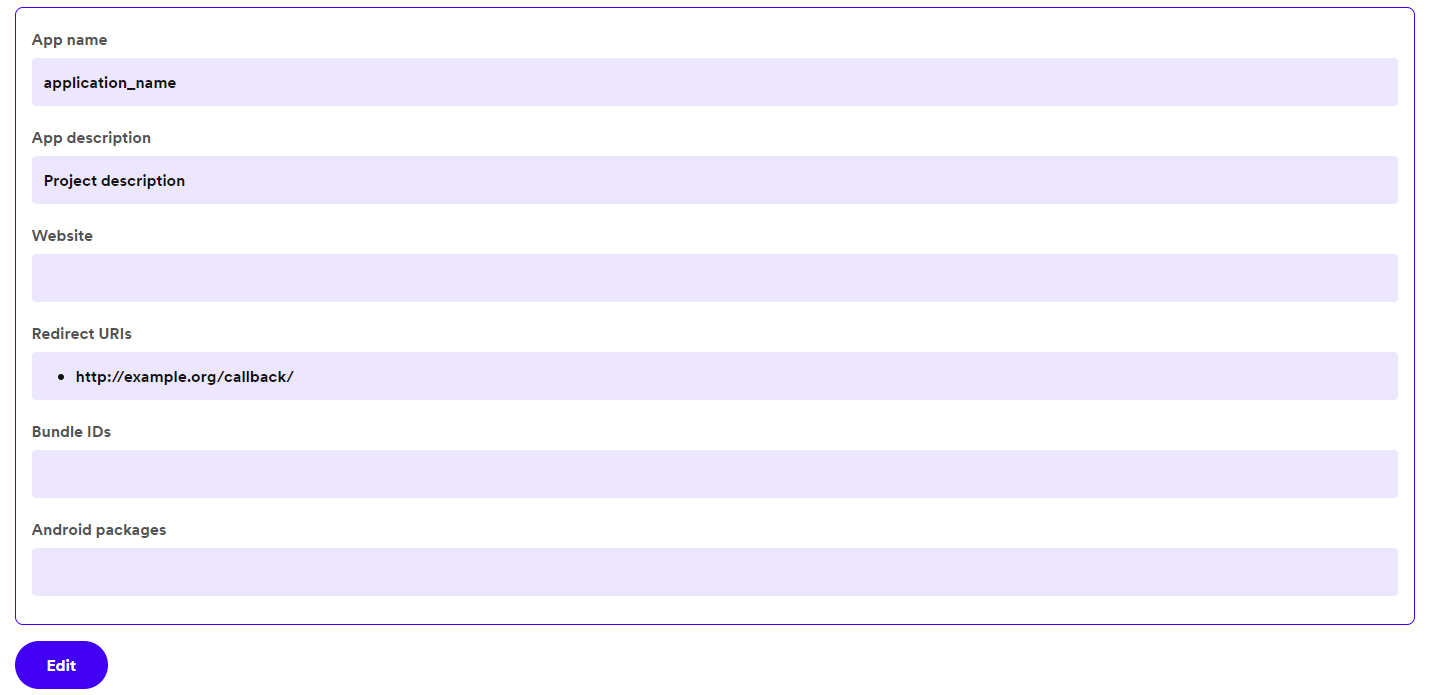

Check "Setting" this will navigate you to application setting to get Client ID and Client secret.

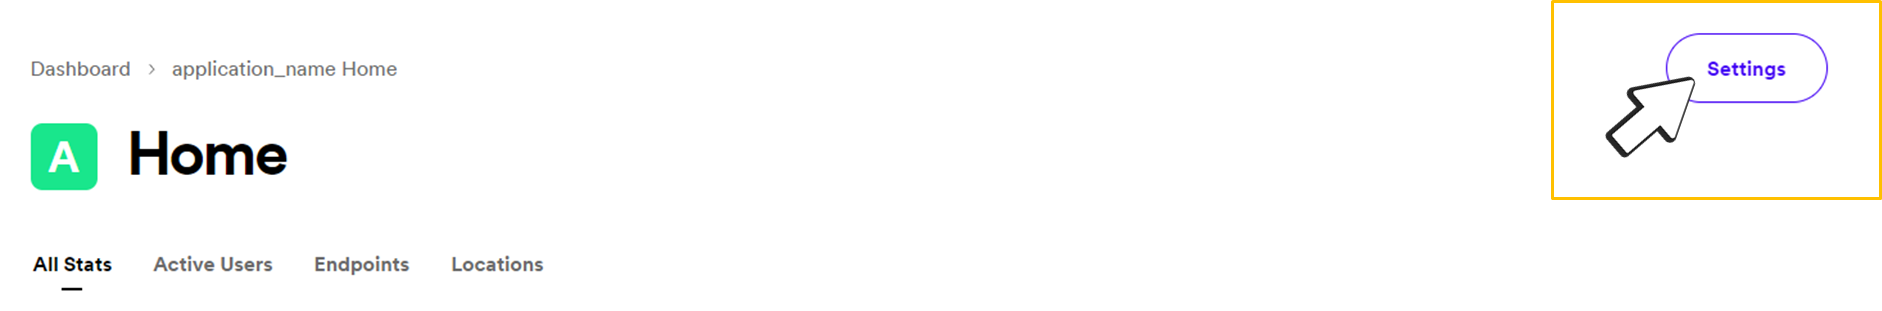

Copy both to create credential for your connection.

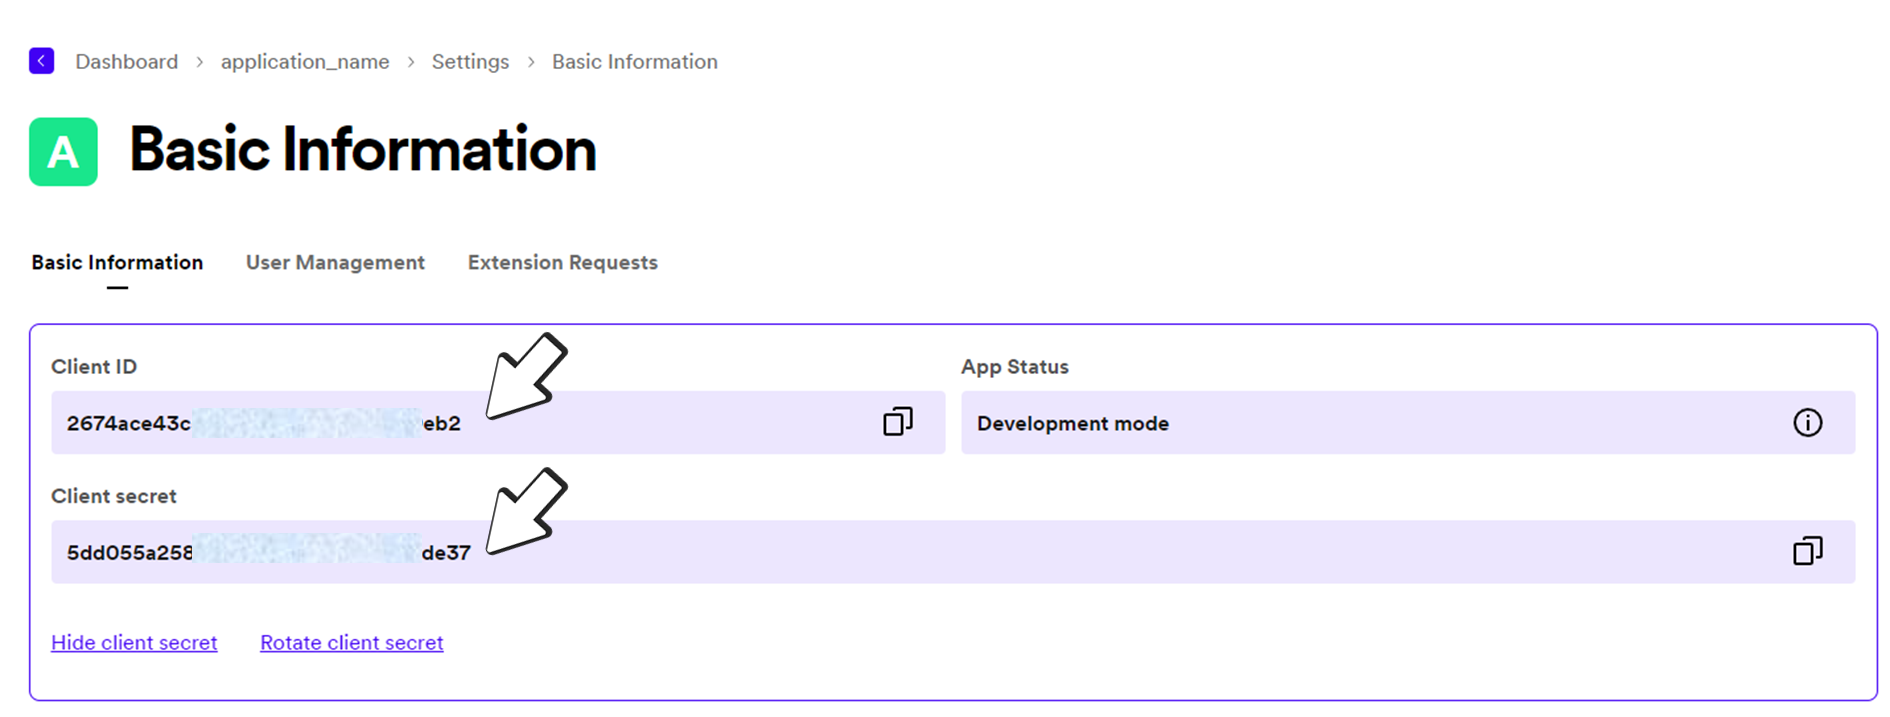

In [ ]:
# Fill in Client ID and Client secret of your own
client_id = "your client id"
client_secret = "your client secret"

Add more credentials ==> Redirect URIs.
You can add or edit from here.

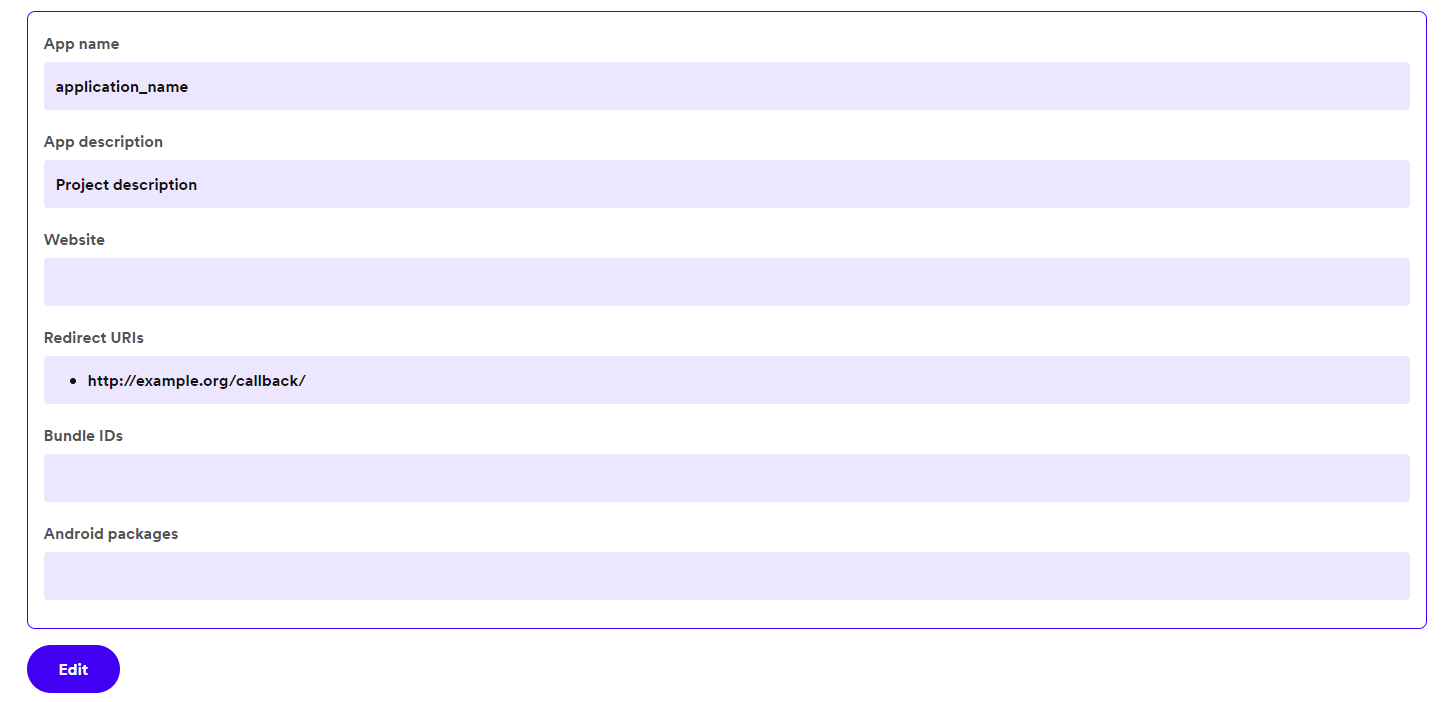

In [ ]:
redirect_uri = "http://example.org/callback/"

# Connect Spotipy API

Next, we will use the Spotipy library to connect with the Spotify API with Python:

In [ ]:
!pip install spotipy

Connect with Spotify Library

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

Now, we're connected but we also need to define app scope to determine our scope of access. You can find a list of scopes here.

https://developer.spotify.com/documentation/general/guides/authorization/scopes/

In this case, we'll use "user-read-recently-played" as a scope.

In [ ]:
scope = "user-read-recently-played"

Next, we'll test API that it can connect or not. (Make sure that all credential are correct with the dashboard app)

After Run, it'll appear the url and input space like this.

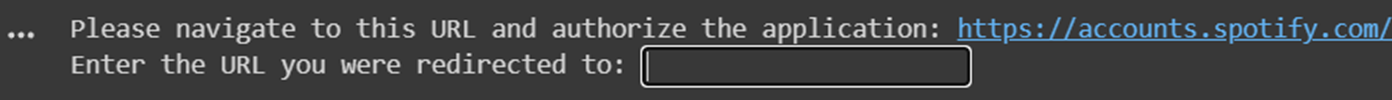

Open URL it should redirect you to the new tab. Then, click agree (This will required only the first time).

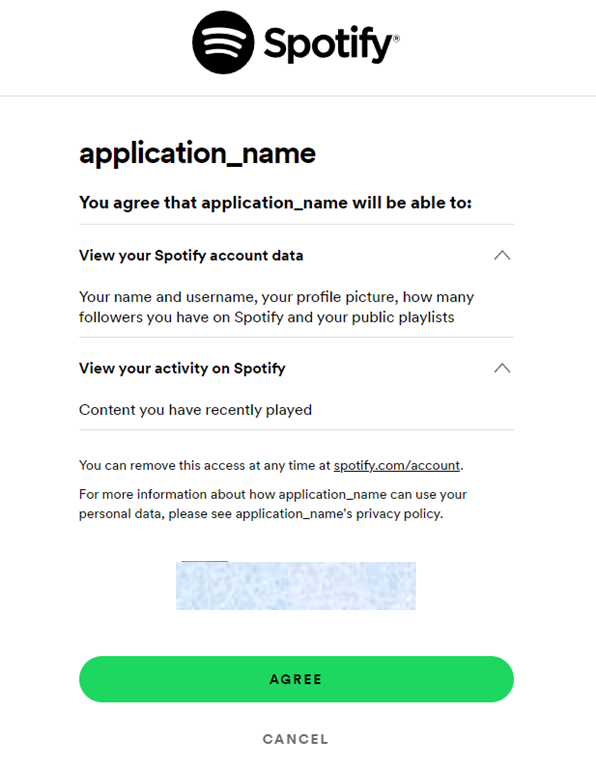

After you press AGREE, it'll bring you to new tab that 404 - Not Found shown.
Go to your URL and copy all after .../?code=

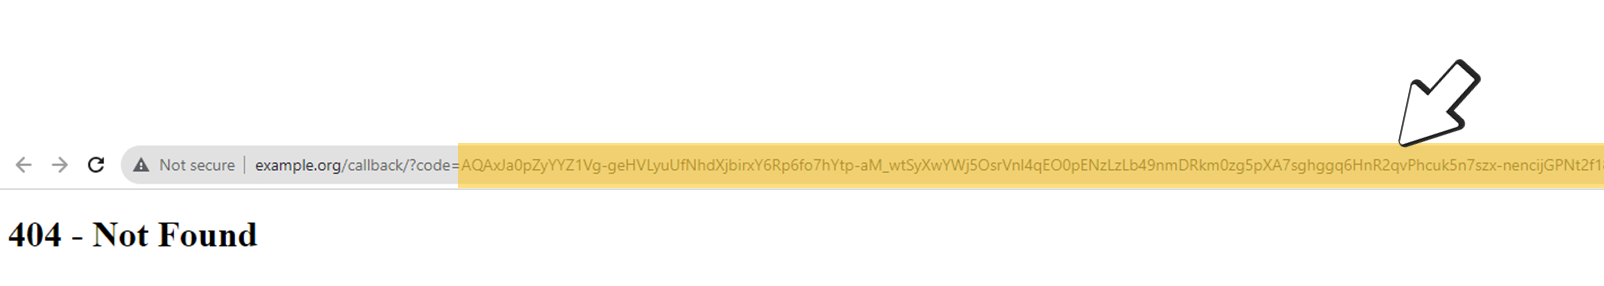

Place copied into input space. Then, press ENTER on you keyboard. You'll got the token.

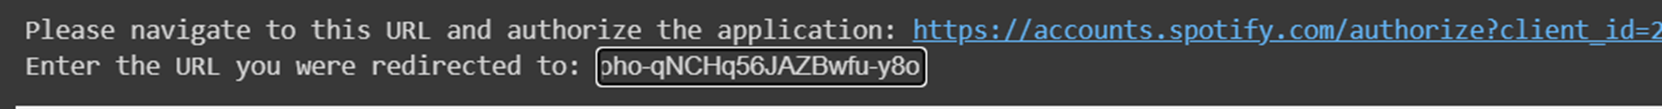

In [ ]:
# Initialize SpotifyOAuth
sp_oauth = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope=scope,  # Specify the scopes you need
)

# Get the authentication token
token_info = sp_oauth.get_cached_token()

if not token_info:
    auth_url = sp_oauth.get_authorize_url()
    print("Please navigate to this URL and authorize the application: " + auth_url)
    response = input("Enter the URL you were redirected to: ")
    token_info = sp_oauth.get_access_token(response)

# Now you can use the token_info to make API requests using spotipy
sp = spotipy.Spotify(auth=token_info['access_token'])

# Example: Get the user's playlists
results = sp.current_user_recently_played()

Please navigate to this URL and authorize the application: https://accounts.spotify.com/authorize?client_id=2674ace43c584f4d8130dbfddae29eb2&response_type=code&redirect_uri=http%3A%2F%2Fexample.org%2Fcallback%2F&scope=user-read-recently-played
Enter the URL you were redirected to: AQAxJa0pZyYYZ1Vg-geHVLyuUfNhdXjbirxY6Rp6fo7hYtp-aM_wtSyXwYWj5OsrVnI4qEO0pENzLzLb49nmDRkm0zg5pXA7sghggq6HnR2qvPhcuk5n7szx-nencijGPNt2f187IE9j9QGNZdt1oe0m_6k5Em58rx90QUybPXNQQJFFTccrSKwtfpho-qNCHq56JAZBwfu-y8o


<ipython-input-39-b46ca45fbba7>:16: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token(response)


In [ ]:
token_info['access_token'] # check your token here. This will be expired within 3600 sec.

'BQBJXY9B1to6h9VwA0GCfRQ9VDPc8fARYU2DzoruLD0HWIz9IHVFz-7qAjhBYG3haxps_UWTr94NucfM0plZ7Soq3zgs8GHP_BfwYI3hTsTl--NOjxuQj_LjozUely9rYd9dl2WkxHyZLaGWn8SDwRFvM_dsJApIUOaB75FLtEFpP2WWbG4tS2fx9pP0Ij2AIlppWwBAkC04Uow'

In [ ]:
results.keys() # test API

dict_keys(['items', 'next', 'cursors', 'limit', 'href'])

Let's explore our last 50 songs we've just listen.

In [ ]:
for idx, item in enumerate(results['items']):
    track_id = item['track']
    track_name = track_id['name']
    artist_name = track_id['artists'][0]['name']

    print(f"{idx}.) {track_name} by {artist_name}")

0.) Haunted (Taylor's Version) by Taylor Swift
1.) I Knew You Were Trouble (Taylor's Version) by Taylor Swift
2.) Tell Me Why (Taylor’s Version) by Taylor Swift
3.) dorothea by Taylor Swift
4.) You're On Your Own, Kid by Taylor Swift
5.) cardigan by Taylor Swift
6.) Death By A Thousand Cuts by Taylor Swift
7.) Dear John (Taylor's Version) by Taylor Swift
8.) invisible string by Taylor Swift
9.) Love Story (Taylor’s Version) by Taylor Swift
10.) You’re Not Sorry (Taylor’s Version) by Taylor Swift
11.) Bye Bye Baby (Taylor’s Version) (From The Vault) by Taylor Swift
12.) this is me trying by Taylor Swift
13.) ivy by Taylor Swift
14.) I Think He Knows by Taylor Swift
15.) dorothea by Taylor Swift
16.) Treacherous (Taylor's Version) by Taylor Swift
17.) Maroon by Taylor Swift
18.) peace by Taylor Swift
19.) Karma by Taylor Swift
20.) Castles Crumbling (feat. Hayley Williams) (Taylor’s Version) (From The Vault) by Taylor Swift
21.) Anti-Hero by Taylor Swift
22.) All Of The Girls You Loved B

# Extract Taylor Swift's Albums

In [ ]:
taylor_swift = sp.artist("06HL4z0CvFAxyc27GXpf02") # Define artist Spotify ID

In [ ]:
taylor_swift

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'followers': {'href': None, 'total': 82377431},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb6a224073987b930f99adc706',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051746a224073987b930f99adc706',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1786a224073987b930f99adc706',
   'width': 160}],
 'name': 'Taylor Swift',
 'popularity': 100,
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

Now, let’s get Taylor’s albums:

In [ ]:
taylor_albums = sp.artist_albums(taylor_swift['id'], limit=50)

In [ ]:
for album in taylor_albums['items']:
    print(f"Album: {album['name']} -- ID: {album['id']}")

Cleaning Data

We got problems, some of Taylor's albums has re-recording that we know in "Taylor's Version" and some "Special Edition". Let's drop the duplicates and create new clean list of album.

In [ ]:
album_names = []
albums = []

for album in taylor_albums['items']:
    album_name = album['name']
    album_id = album['id']

    if album_name[:3] not in album_names and "remix" not in album_name and "Karaoke" not in album_name and "Live" not in album_name:
        album_names.append(album_name[:3] )
        albums.append((album_name,album_id))

In [ ]:
albums

[("Speak Now (Taylor's Version)", '5AEDGbliTTfjOB8TSm1sxt'),
 ('Midnights (The Til Dawn Edition)', '1fnJ7k0bllNfL1kVdNVW1A'),
 ("Red (Taylor's Version)", '6kZ42qRrzov54LcAk4onW9'),
 ("Fearless (Taylor's Version)", '4hDok0OAJd57SGIT8xuWJH'),
 ('evermore (deluxe version)', '6AORtDjduMM3bupSWzbTSG'),
 ('folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
  '0PZ7lAru5FDFHuirTkWe9Z'),
 ('Lover', '1NAmidJlEaVgA3MpcPFYGq'),
 ('reputation', '6DEjYFkNZh67HP7R9PSZvv'),
 ('1989 (Deluxe)', '1yGbNOtRIgdIiGHOEBaZWf'),
 ('Taylor Swift (Big Machine Radio Release Special)',
  '2rU7u7C2v5i45MFVxx7xG1'),
 ('Lavender Haze (Acoustic Version)', '6eKdbTio5viiwJ5FE5J8wU'),
 ('Anti-Hero (Acoustic Version)', '5vgWXUueeEU2labRz6TlNv'),
 ('Carolina (From The Motion Picture “Where The Crawdads Sing”)',
  '5Bwg2XxrjTlrNy6BC7KQZf'),
 ('All Too Well (10 Minute Version) (The Short Film)',
  '2O1NYIBQCUobrL97A2Unk8'),
 ('This Love (Taylor’s Version)', '3In1CblWZswwun5MhOa10y'),
 ('The 

We see first 10 lists are Tayler's album and we can see that there are some singles also, let’s remove them out:

In [ ]:
final_album_list = albums[:-16]

In [ ]:
final_album_list

[("Speak Now (Taylor's Version)", '5AEDGbliTTfjOB8TSm1sxt'),
 ('Midnights (The Til Dawn Edition)', '1fnJ7k0bllNfL1kVdNVW1A'),
 ("Red (Taylor's Version)", '6kZ42qRrzov54LcAk4onW9'),
 ("Fearless (Taylor's Version)", '4hDok0OAJd57SGIT8xuWJH'),
 ('evermore (deluxe version)', '6AORtDjduMM3bupSWzbTSG'),
 ('folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
  '0PZ7lAru5FDFHuirTkWe9Z'),
 ('Lover', '1NAmidJlEaVgA3MpcPFYGq'),
 ('reputation', '6DEjYFkNZh67HP7R9PSZvv'),
 ('1989 (Deluxe)', '1yGbNOtRIgdIiGHOEBaZWf'),
 ('Taylor Swift (Big Machine Radio Release Special)',
  '2rU7u7C2v5i45MFVxx7xG1')]

Finally, we got Tay's 10 albums!! Let's see the songs in them.

# Extract Taylor's Song

Songs from Taylor's albums

In [ ]:
taylor_song_ids = []

for album_name, album_id in final_album_list:
    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_name = track['name']
        track_id = track['id']
        taylor_song_ids.append((album_name,album_id,track_name,track_id))

In [ ]:
taylor_song_ids[0] # to see track 1 of the latest album

("Speak Now (Taylor's Version)",
 '5AEDGbliTTfjOB8TSm1sxt',
 "Mine (Taylor's Version)",
 '7G0gBu6nLdhFDPRLc0HdDG')

In [ ]:
len(taylor_song_ids) # see amount of all songs in all album.

234

# Song's feature analysis

In [ ]:
import pandas as pd

In [ ]:
# Test out one song:
features = sp.audio_features(tracks=['7G0gBu6nLdhFDPRLc0HdDG']) # "Mine" song ID

In [ ]:
features

[{'danceability': 0.646,
  'energy': 0.783,
  'key': 7,
  'loudness': -2.846,
  'mode': 1,
  'speechiness': 0.0356,
  'acousticness': 0.00444,
  'instrumentalness': 1.38e-06,
  'liveness': 0.171,
  'valence': 0.49,
  'tempo': 121.08,
  'type': 'audio_features',
  'id': '7G0gBu6nLdhFDPRLc0HdDG',
  'uri': 'spotify:track:7G0gBu6nLdhFDPRLc0HdDG',
  'track_href': 'https://api.spotify.com/v1/tracks/7G0gBu6nLdhFDPRLc0HdDG',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7G0gBu6nLdhFDPRLc0HdDG',
  'duration_ms': 231707,
  'time_signature': 4}]

In [ ]:
pd.Series(features[0]) # make data into Series

danceability                                                    0.646
energy                                                          0.783
key                                                                 7
loudness                                                       -2.846
mode                                                                1
speechiness                                                    0.0356
acousticness                                                  0.00444
instrumentalness                                             0.000001
liveness                                                        0.171
valence                                                          0.49
tempo                                                          121.08
type                                                   audio_features
id                                             7G0gBu6nLdhFDPRLc0HdDG
uri                              spotify:track:7G0gBu6nLdhFDPRLc0HdDG
track_href          

Let’s create a pandas DataFrame of this song feature:

In [ ]:
df = pd.DataFrame()

# This will take awhile, due to us not using the batch feature
for album_name,album_id,track_name, track_id in taylor_song_ids:
    features = sp.audio_features(tracks=[track_id])[0]
    features['album_name'] = album_name
    features['album_id'] = album_id
    features['track_name'] = track_name
    ser = pd.Series(features)
    df = pd.concat([df,ser],axis=1)

In [ ]:
df

In [ ]:
df = df.transpose().set_index('id') # Tranpose to fix concat issue due to axis=1
df.head()[['danceability', 'energy', 'key', 'acousticness','album_name','track_name']]

,danceability,energy,key,acousticness,album_name,track_name
id,,,,,,
7G0gBu6nLdhFDPRLc0HdDG,0.646,0.783,7,0.00444,Speak Now (Taylor's Version),Mine (Taylor's Version)
3MytWN8L7shNYzGl4tAKRp,0.588,0.758,5,0.0251,Speak Now (Taylor's Version),Sparks Fly (Taylor’s Version)
79uDOz0zuuWS7HWxzMmTa2,0.497,0.635,2,0.00621,Speak Now (Taylor's Version),Back To December (Taylor's Version)
5xXqyjLicvEpch72qEryFT,0.727,0.677,7,0.248,Speak Now (Taylor's Version),Speak Now (Taylor's Version)
1zU8j1x3yi9xalMF96pzKp,0.419,0.47,4,0.0236,Speak Now (Taylor's Version),Dear John (Taylor's Version)


# Visualizing the Songs

Let’s explore how much Taylor’s music varies from album to album. We’ll begin by creating a dataframe that consists only of the Spotify audio features:

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'album_name', 'album_id', 'track_name'],
      dtype='object')

In [ ]:
data_features = df.drop(['type', 'uri', 'track_href', 'analysis_url','album_name', 'album_id', 'track_name'],axis=1) # drop unused columns

In [ ]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,234.00,234.000,234,234.000,234,234.000,234.0000
unique,185.00,202.000,12,230.000,2,180.000,215.0000
top,0.72,0.386,0,-6.942,1,0.031,0.0158
freq,3.00,3.000,42,2.000,204,5.000,2.0000


It looks like our columns are still str objects, let’s change them to float:

In [ ]:
for col in data_features.columns:
    data_features[col] = data_features[col].apply(float)

In [ ]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.591744,0.534795,4.807692,-8.145457,0.871795,0.121570,0.396146
std,0.113793,0.197578,3.376481,3.144303,0.335035,0.233004,0.358571
min,0.292000,0.128000,0.000000,-17.932000,0.000000,0.023200,0.000191
25%,0.515000,0.372250,2.000000,-10.536250,1.000000,0.031000,0.046050
50%,0.600000,0.549000,5.000000,-7.641500,1.000000,0.040150,0.263500
75%,0.666250,0.698750,7.000000,-5.732000,1.000000,0.064550,0.803250
max,0.897000,0.934000,11.000000,-1.909000,1.000000,0.953000,0.971000


All of them have been already convert from str to float.

Plotting Acoustic Music Quality.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

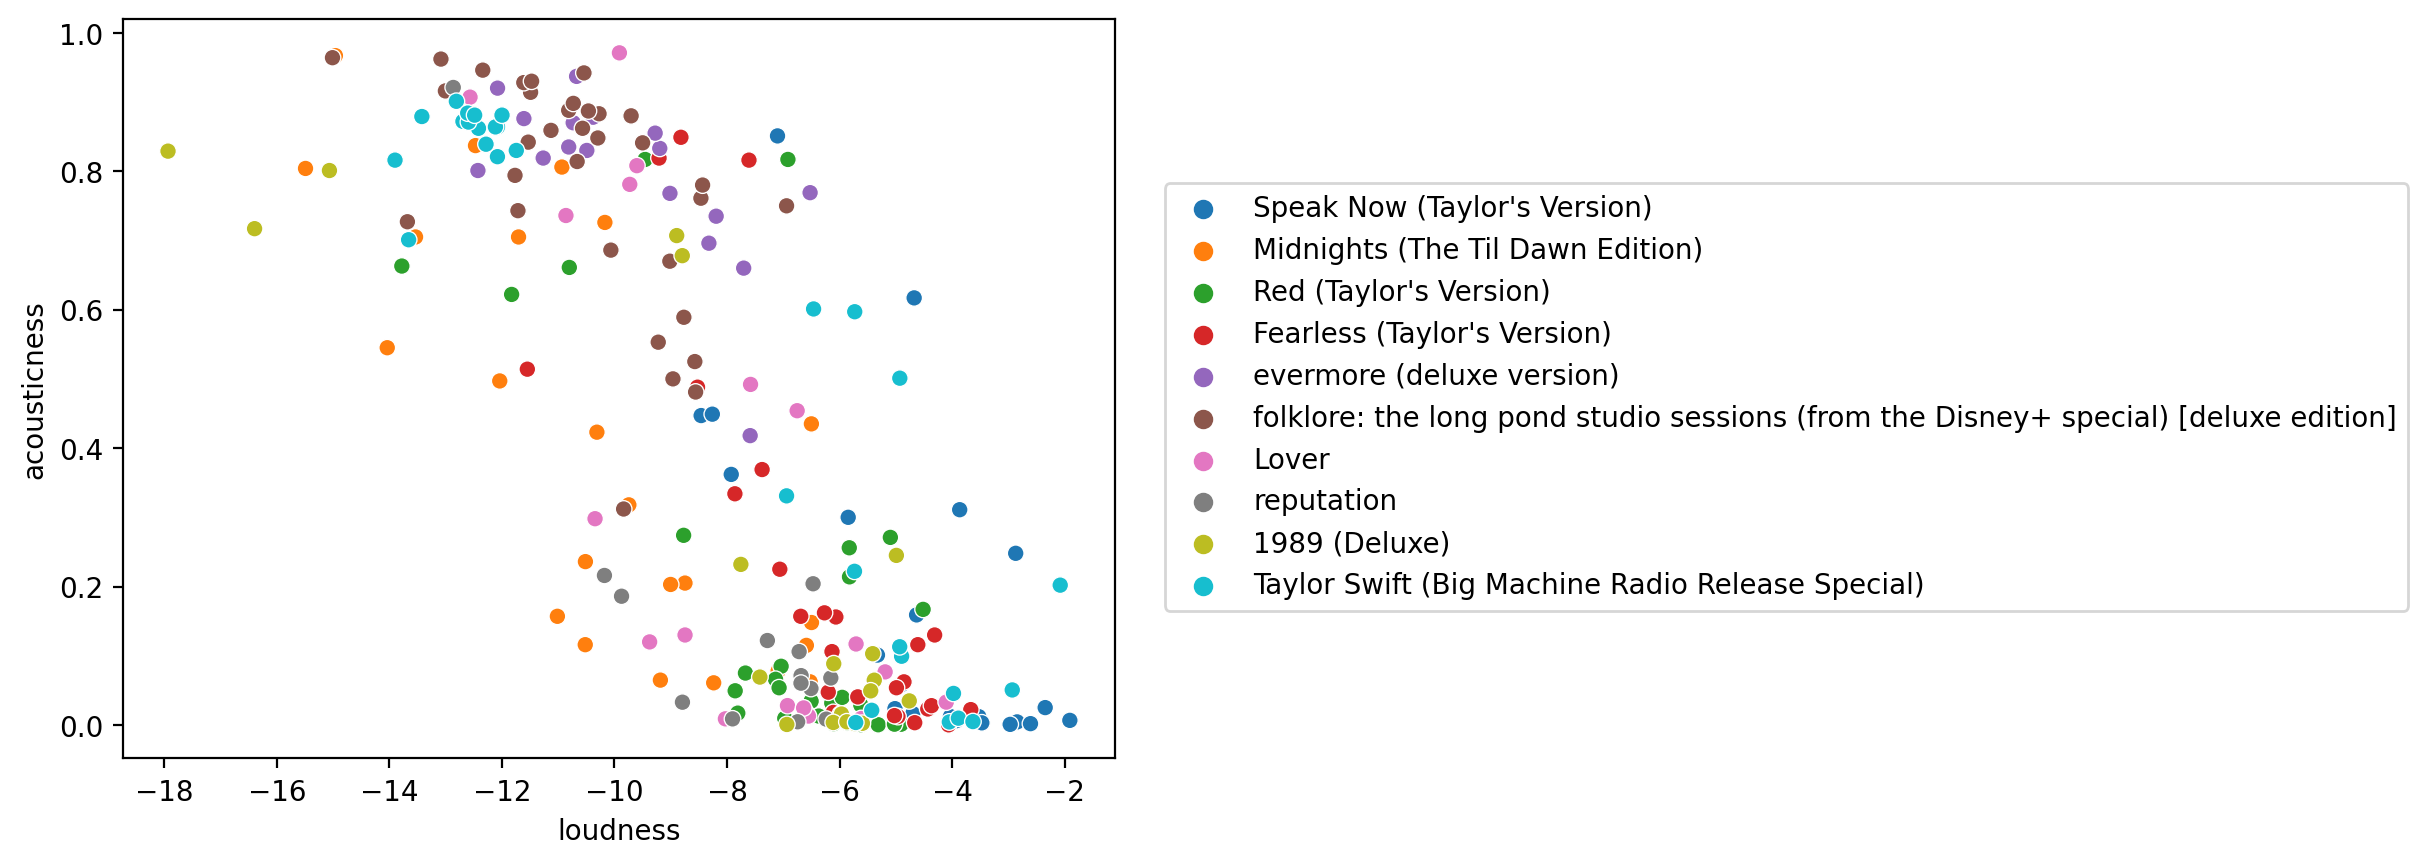

In [ ]:
plt.figure(dpi=200)
sns.scatterplot(x='loudness',y='acousticness',data=data_features,hue=df['album_name'])
plt.legend(loc=(1.05,0.2))

Can you analyze what this plotted can be describe?

Evermore and Folklore quite a lot for acousticness. On the other hand, Reputation acousticness is so low ...

**Let's try out the other features!!!**